# Example: Cell division and mutation

Consider this application of branching processes. A scientist was infected by two cells of a very deadly bacterium six days ago. The cell in question can divide once every 24 hours but dies in 40% of attempted division. It took three days to develop an antibiotic which brings this probability of death up to 60%. The antibiotic was used for three days. The team only now realized that, during treatment, every successful division had a 20% chance of inducing a mutation in the bacterium and that mutants only die in 10% of attempted division.

What is the joint distribution for the number of original cells and the number of mutant cells given the events that transpired?  

## Temporal dynamics with PGFs

In what follows, we apply the tools explored in the previous sections. The recipe goes something like this. First, we need to track two quantities so we will use $x$ as our counting variable for original cells and $y$ for mutant cells. Second, we then need to define the PGFs for the cell division process for both original and mutant cells; $G_x(x,y)$ and $G_y(x,y)$ respectively. Third, we need to define a function that composes these PGFs to capture the generational (or temporal) aspect of the dynamics. 

There are two important things to stress at this point. The variables can be iterated as a simple rule book, and we use temporary variables ($x_p$ and $y_p$ below) to avoid any interference between generations. In this case, the parameters also vary at different generations and we need to remember that the generations are applied *backwards in times.* Indeed, the last thing we need to do is apply our *initial conditions* when we return the value of the composition of generations.

The code below applies this recipe. Some values specific to this problem, like the number of generations and the initial conditions, are hard-coded to highlight where they come into play.

/tmp/ipykernel_223178/1015147889.py:38: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Log likelihood')


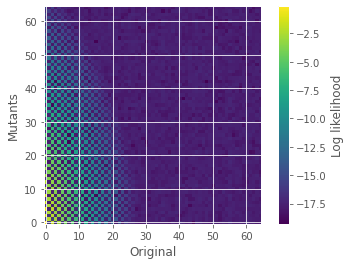

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])

#Original cell division and mutation
def Gx(p0, p1, q, x, y):
  return 1-p0+p0*((1-q)*x+q*y)**2

#Mutant division
def Gy(p0, p1, q, x, y):
  return 1-p1 +p1*y**2
  
#Generation function
def Q(n,x,y):
  for rep in range(n): 
    if n-rep>3: #three last days
      p0 = 0.2 #treated division success
      p1 = 0.90 #mutant division success
      q = 0.2 #mutation probability
    else: #first three days
      p0 = 0.6
      p1 = 0.90
      q = 0.0
    xp = Gx(p0, p1, q, x, y)
    yp = Gy(p0, p1, q, x, y)
    x,y = xp,yp
  return x**2 #initial conditions

#calculation
N = 65
n = np.arange(N)
c = np.exp(2*np.pi*1j*n/N)
(C1, C2) = np.meshgrid(c, c) #get 2d array versions
pn1n2 = abs(np.fft.fft2(Q(6,C1,C2))/(N*N))

#plotting
plt.imshow(np.log10(pn1n2), origin='lower')
plt.colorbar(label='Log likelihood')
plt.ylabel(r'Mutants')
plt.xlabel(r'Original')
plt.show()

## Trivariate example

As a brief example, consider a similar process with two types of mutants. We will use $x$ to count original cells, $y$ to count first generation mutant which are almost able to survive but not quite, and $z$ to count next-level mutants which can thrive.

We extend the simple binary dynamics of the previous example. We use 10 original cells as initial conditions, and we plot the joint distributions of both types of mutants after 6 generations.

/tmp/ipykernel_223178/1104920709.py:37: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Log likelihood')


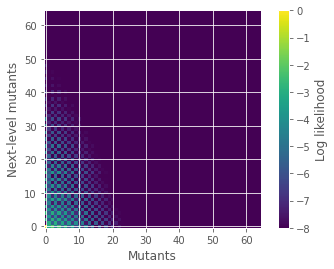

In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])

def Gx(p0, p1, p2, q0, q1, x, y, z):
  return 1-p0+p0*((1-q0)*x+q0*y)**2

def Gy(p0, p1, p2, q0, q1, x, y, z):
  return 1-p1 +p1*((1-q1)*y+q1*z)**2

def Gz(p0, p1, p2, q0, q1, x, y, z):
  return 1-p2 +p2*z**2

def Q(n, p0, p1, q0, q1, x, y, z):
  for rep in range(n):
    xp = Gx(p0, p1, p2, q0, q1, x, y, z)
    yp = Gy(p0, p1, p2, q0, q1, x, y, z)
    zp = Gz(p0, p1, p2, q0, q1, x, y, z)
    x, y, z = xp, yp, zp
  return x**10

#parameters
p0 = 0.2
p1 = 0.48
p2 = 0.95
q0 = 0.02
q1 = 0.06
number = 6

N = 65
n = np.arange(N)
c = np.exp(2*np.pi*1j*n/N)
(C2, C3) = np.meshgrid(c, c) #get 2d array versions for y and z
pn2n3 = abs(np.fft.fft2(Q(number,p0,p1,q0,q1,1,C2,C3))/(N*N)) #sum over x with x=1

plt.imshow(np.log10(pn2n3), origin='lower')
plt.colorbar(label='Log likelihood')
plt.clim([-8,0])
plt.ylabel(r'Next-level mutants')
plt.xlabel(r'Mutants')
plt.show()

:::{tip}
To sum over all numbers of original cells and save on computation, we simply force $x$ to be equal to 1 and use a Fourier transform over the remaining dimensions only. Be careful: By default the [fft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html) function will always be computed over the last two axes of the input array. If we wanted to extract a trivariate distribution, we would need to specify which axes to use (the last three in this case).
:::